<a href="https://colab.research.google.com/github/yweslakarep123/depressed/blob/main/Depression_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content"

In [3]:
!chmod 600 /content/kaggle.json

In [4]:
!kaggle datasets download -d anthonytherrien/depression-dataset

Dataset URL: https://www.kaggle.com/datasets/anthonytherrien/depression-dataset
License(s): CC-BY-SA-4.0
  0% 0.00/8.69M [00:00<?, ?B/s]
100% 8.69M/8.69M [00:00<00:00, 181MB/s]


In [5]:
!pip install patool pyunpack

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.7 MB/s eta 0:00:00


In [14]:
!pip install wolta

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 6.0 MB/s eta 0:00:00


In [6]:
from pyunpack import Archive
zip_file_path = '/content/depression-dataset.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/depression_data.csv')
df.head()

,Name,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,Christine Barker,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,Jacqueline Lewis,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,Shannon Church,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,Charles Jordan,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,Michael Rich,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes


In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 16 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Name                          413768 non-null  object 
 1   Age                           413768 non-null  int64  
 2   Marital Status                413768 non-null  object 
 3   Education Level               413768 non-null  object 
 4   Number of Children            413768 non-null  int64  
 5   Smoking Status                413768 non-null  object 
 6   Physical Activity Level       413768 non-null  object 
 7   Employment Status             413768 non-null  object 
 8   Income                        413768 non-null  float64
 9   Alcohol Consumption           413768 non-null  object 
 10  Dietary Habits                413768 non-null  object 
 11  Sleep Patterns                413768 non-null  object 
 12  History of Mental Illness     413768 non-nul

<Axes: ylabel='Chronic Medical Conditions'>

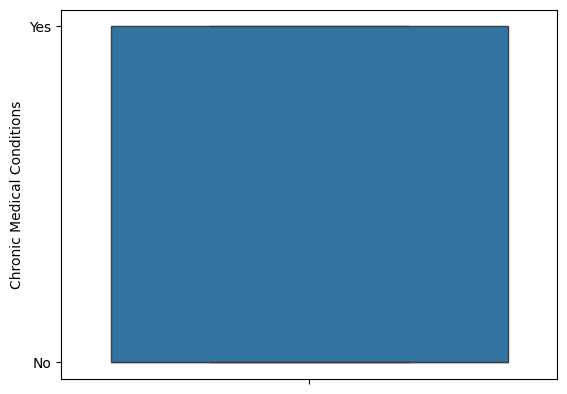

In [134]:
sns.boxplot(df['Chronic Medical Conditions'])

In [135]:
df.drop(columns = ["Name"], inplace = True)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413768 entries, 0 to 413767
Data columns (total 15 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Age                           413768 non-null  int64  
 1   Marital Status                413768 non-null  object 
 2   Education Level               413768 non-null  object 
 3   Number of Children            413768 non-null  int64  
 4   Smoking Status                413768 non-null  object 
 5   Physical Activity Level       413768 non-null  object 
 6   Employment Status             413768 non-null  object 
 7   Income                        413768 non-null  float64
 8   Alcohol Consumption           413768 non-null  object 
 9   Dietary Habits                413768 non-null  object 
 10  Sleep Patterns                413768 non-null  object 
 11  History of Mental Illness     413768 non-null  object 
 12  History of Substance Abuse    413768 non-nul

In [137]:
from wolta.data_tools import col_types
types = col_types(df, print_columns=True)

Age: int64
Marital Status: str
Education Level: str
Number of Children: int64
Smoking Status: str
Physical Activity Level: str
Employment Status: str
Income: float64
Alcohol Consumption: str
Dietary Habits: str
Sleep Patterns: str
History of Mental Illness: str
History of Substance Abuse: str
Family History of Depression: str
Chronic Medical Conditions: str


In [138]:
from wolta.data_tools import list_deletings
del_col = list_deletings(df)
del_col

The maximum tolerated null value amount is 82753
The maximum tolerated unique value amount is 41376 in string data


,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,Married,Bachelor's Degree,2,Non-smoker,Active,Unemployed,26265.67,Moderate,Moderate,Fair,Yes,No,Yes,Yes
1,55,Married,High School,1,Non-smoker,Sedentary,Employed,42710.36,High,Unhealthy,Fair,Yes,No,No,Yes
2,78,Widowed,Master's Degree,1,Non-smoker,Sedentary,Employed,125332.79,Low,Unhealthy,Good,No,No,Yes,No
3,58,Divorced,Master's Degree,3,Non-smoker,Moderate,Unemployed,9992.78,Moderate,Moderate,Poor,No,No,No,No
4,18,Single,High School,0,Non-smoker,Sedentary,Unemployed,8595.08,Low,Moderate,Fair,Yes,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413763,68,Married,Master's Degree,0,Former,Moderate,Employed,109233.43,Low,Healthy,Good,No,No,No,No
413764,26,Single,Bachelor's Degree,0,Current,Active,Employed,96760.97,Low,Healthy,Poor,Yes,Yes,No,Yes
413765,57,Married,Bachelor's Degree,0,Non-smoker,Sedentary,Employed,77353.26,Moderate,Moderate,Fair,No,No,Yes,Yes
413766,71,Married,Associate Degree,2,Non-smoker,Sedentary,Unemployed,24557.08,Moderate,Moderate,Poor,No,Yes,No,No


In [139]:
df.describe()

,Age,Number of Children,Income
count,413768.000000,413768.000000,413768.000000
mean,49.000713,1.298972,50661.707971
std,18.158759,1.237054,40624.100565
min,18.000000,0.000000,0.410000
25%,33.000000,0.000000,21001.030000
50%,49.000000,1.000000,37520.135000
75%,65.000000,2.000000,76616.300000
max,80.000000,4.000000,209995.220000


<Axes: ylabel='count'>

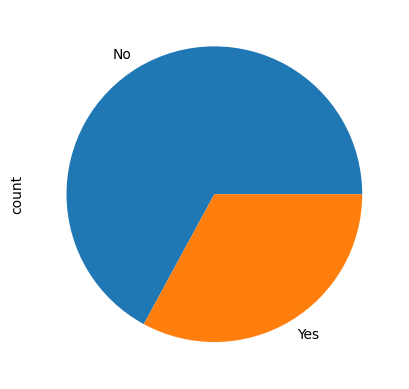

In [140]:
df['Chronic Medical Conditions'].value_counts().plot(kind='pie')

In [141]:
from wolta.data_tools import make_numerics

types = col_types(df)
loc = 0

for col in df.columns:
    if types[loc] == 'str':
        df[col] = make_numerics(df[col])

    loc += 1

In [142]:
df.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression,Chronic Medical Conditions
0,31,0,0,2,0,0,0,26265.67,0,0,0,0,0,0,0
1,55,0,1,1,0,1,1,42710.36,1,1,0,0,0,1,0
2,78,1,2,1,0,1,1,125332.79,2,1,1,1,0,0,1
3,58,2,2,3,0,2,0,9992.78,0,0,2,1,0,1,1
4,18,3,1,0,0,1,0,8595.08,2,0,0,0,0,0,0


In [143]:
X = df.drop('Chronic Medical Conditions', axis=1)
y = df['Chronic Medical Conditions']

In [144]:
X.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
0,31,0,0,2,0,0,0,26265.67,0,0,0,0,0,0
1,55,0,1,1,0,1,1,42710.36,1,1,0,0,0,1
2,78,1,2,1,0,1,1,125332.79,2,1,1,1,0,0
3,58,2,2,3,0,2,0,9992.78,0,0,2,1,0,1
4,18,3,1,0,0,1,0,8595.08,2,0,0,0,0,0


In [145]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [146]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((331014, 14), (82754, 14), (331014,), (82754,))

In [148]:
X_train.head()

,Age,Marital Status,Education Level,Number of Children,Smoking Status,Physical Activity Level,Employment Status,Income,Alcohol Consumption,Dietary Habits,Sleep Patterns,History of Mental Illness,History of Substance Abuse,Family History of Depression
166515,57,2,1,0,0,2,1,27058.50,0,1,1,1,0,1
1901,20,3,1,0,2,1,0,4655.70,2,0,1,1,0,1
191290,52,2,3,1,0,0,0,29287.41,2,1,0,1,0,1
12726,68,0,0,3,0,2,0,21187.99,1,2,0,1,1,0
56881,78,0,2,1,1,1,0,22961.79,0,0,0,0,0,0


In [147]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [180]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=8)  # Select top 10 features
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [184]:
from sklearn.linear_model import SGDClassifier
from sklearn.kernel_approximation import Nystroem
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    precision_score,
    recall_score
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))

clf = Pipeline([
    ('kernel', Nystroem(kernel='rbf', n_components=300, random_state=42)),
    ('sgd', SGDClassifier(loss="log_loss", penalty="elasticnet",
                          alpha=0.0001, l1_ratio=0.15,
                          max_iter=1000, tol=1e-3,
                          class_weight=class_weight_dict,
                          random_state=42))
])

# Fit the classifier
clf.fit(X_train_selected, y_train)

# Make predictions
y_pred = clf.predict(X_test_selected)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


print("Confusion Matrix (original predictions):")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report (original predictions):")
print(classification_report(y_test, y_pred))


Accuracy: 0.6054
Precision: 0.5978
Recall: 0.6054
F1 Score: 0.6013
Confusion Matrix (original predictions):
[[ 9886 17360]
 [15291 40217]]

Classification Report (original predictions):
              precision    recall  f1-score   support

           0       0.39      0.36      0.38     27246
           1       0.70      0.72      0.71     55508

    accuracy                           0.61     82754
   macro avg       0.55      0.54      0.54     82754
weighted avg       0.60      0.61      0.60     82754

